In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/IEOR_142_Final_Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
survey = pd.read_csv("final_survey_data.csv")
survey

,Unnamed: 0,Age,Gender,Country,self_employed,family_history,treatment,work_interface,no_employees,benefits,care_options,wellness_program,seek_help,anonymity,leave,supervisor,coworkers,phys_health_interview,mental_health_interview
0,96,0.232143,0,60,0,1,1,4,1,1,2,1,0,0,1,2,2,2,1
1,97,0.303571,1,60,0,1,0,1,1,3,2,1,1,0,1,1,2,2,1
2,98,0.392857,1,62,0,2,1,4,4,0,0,0,1,2,0,2,1,0,1
3,99,0.142857,1,62,0,0,1,4,5,3,2,0,0,2,0,2,2,1,1
4,100,0.285714,1,62,0,2,0,3,1,3,0,1,0,2,5,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,1613,0.267857,1,61,0,2,1,4,1,3,2,2,1,2,1,0,1,0,1
1518,1614,0.214286,1,60,0,1,1,5,2,1,0,1,1,0,5,1,1,1,1
1519,1615,0.321429,1,61,0,2,1,2,2,3,2,1,1,2,4,2,1,1,1
1520,1616,0.357143,1,61,0,2,1,4,5,3,2,1,1,0,4,0,0,1,1


In [6]:
survey = survey.drop("Unnamed: 0", axis = 1)
survey

,Age,Gender,Country,self_employed,family_history,treatment,work_interface,no_employees,benefits,care_options,wellness_program,seek_help,anonymity,leave,supervisor,coworkers,phys_health_interview,mental_health_interview
0,0.232143,0,60,0,1,1,4,1,1,2,1,0,0,1,2,2,2,1
1,0.303571,1,60,0,1,0,1,1,3,2,1,1,0,1,1,2,2,1
2,0.392857,1,62,0,2,1,4,4,0,0,0,1,2,0,2,1,0,1
3,0.142857,1,62,0,0,1,4,5,3,2,0,0,2,0,2,2,1,1
4,0.285714,1,62,0,2,0,3,1,3,0,1,0,2,5,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,0.267857,1,61,0,2,1,4,1,3,2,2,1,2,1,0,1,0,1
1518,0.214286,1,60,0,1,1,5,2,1,0,1,1,0,5,1,1,1,1
1519,0.321429,1,61,0,2,1,2,2,3,2,1,1,2,4,2,1,1,1
1520,0.357143,1,61,0,2,1,4,5,3,2,1,1,0,4,0,0,1,1


In [7]:
train, test = train_test_split(survey, test_size = 0.1, random_state = 42)
y_train = train['treatment']
X_train = train[['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interface', 'no_employees', 
              'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
              'leave', 'supervisor', 'coworkers', 'phys_health_interview', 'mental_health_interview']]
y_test = test['treatment']
X_test = test[['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interface', 'no_employees', 
              'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 
              'leave', 'supervisor', 'coworkers', 'phys_health_interview', 'mental_health_interview']]


In [8]:
gbc = GradientBoostingClassifier(random_state = 88)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=88)

In [9]:
y_pred_gbc = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc)
print("Accuracy: ", accuracy_score(y_test, y_pred_gbc))
print("\nConfusion matrix: ", cm)
print("\nTPR: ", recall_score(y_test, y_pred_gbc))

Accuracy:  0.8627450980392157

Confusion matrix:  [[49 15]
 [ 6 83]]

TPR:  0.9325842696629213


In [10]:
grid_values = {"n_estimators": np.linspace(100, 700, 7, dtype = 'int32'),
              'learning_rate': [0.01, 0.1],
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [50, 200, 500, 1000, 1500],
              'random_state': [88]}
gbc2 = GradientBoostingClassifier()
gbc2_cv = GridSearchCV(gbc2, param_grid = grid_values, cv = 5, n_jobs = -1)
gbc2_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [50, 200, 500, 1000, 1500],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700], dtype=int32),
                         'random_state': [88]})

In [11]:
y_pred_gbc2 = gbc2_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc2)
print("Accuracy: ", accuracy_score(y_test, y_pred_gbc2))
print("\nConfusion matrix: ", cm)
print("\nTPR: ", recall_score(y_test, y_pred_gbc2))

Accuracy:  0.8627450980392157

Confusion matrix:  [[52 12]
 [ 9 80]]

TPR:  0.898876404494382


In [12]:
grid_value_cart = {"ccp_alpha": np.linspace(0, 0.005, 101),
                   "min_samples_leaf": [5],
                   "min_samples_split": [20],
                   "max_depth": [30],
                   "random_state": [88]}

dtc = DecisionTreeClassifier(random_state = 88)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=88)

In [13]:
y_pred_dtc = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dtc)
print("Accuracy: ", accuracy_score(y_test, y_pred_dtc))
print("\nConfusion matrix: ", cm)
print("\nTPR: ", recall_score(y_test, y_pred_dtc))

Accuracy:  0.7843137254901961

Confusion matrix:  [[52 12]
 [21 68]]

TPR:  0.7640449438202247


In [14]:
dtc_cv = GridSearchCV(dtc, param_grid=grid_value_cart, cv=5, verbose=1, scoring='accuracy')
dtc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 101 candidates, totalling 505 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=88),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03...
       3.60e-03, 3.65e-03, 3.70e-03, 3.75e-03, 3.80e-03, 3.85e-03,
       3.90e-03, 3.95e-03, 4.00e-03, 4.05e-03, 4.10e-03, 4.15e-03,
       4.20e-03, 4.25e-03, 4.30e-03, 4.35e-03, 4.40e-03, 4.45e-03,
       4.50e-03, 4.55e-03, 4.60e-03, 4.65e-03, 4.70e-03, 4.75e-03,
       4.80e-03, 4.85e-03, 4.90e-03, 4.95e-03, 5.00e-03]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [15]:
y_pred_dtc2 = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dtc2)
print("Accuracy: ", accuracy_score(y_test, y_pred_dtc2))
print("\nConfusion matrix: ", cm)
print("\nTPR: ", recall_score(y_test, y_pred_dtc2))

Accuracy:  0.8562091503267973

Confusion matrix:  [[51 13]
 [ 9 80]]

TPR:  0.898876404494382


In [16]:
expected_loss = dtc_cv.cv_results_['mean_test_score']
ccp = dtc_cv.cv_results_['param_ccp_alpha'].data
# expected_loss, ccp

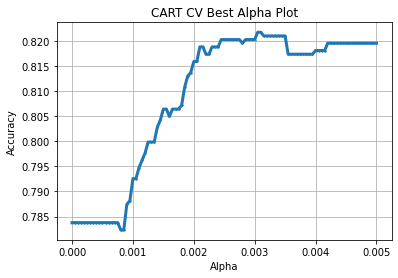

In [17]:
plt.scatter(ccp, expected_loss, s = 2)
plt.plot(ccp, expected_loss, linewidth = 3)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("CART CV Best Alpha Plot")
plt.grid(True, which = 'both')

In [18]:
y_cart = dtc_cv.best_estimator_.predict(X_test)
(y_cart == y_test).mean()

0.8562091503267973

In [19]:
dtc_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.00305, max_depth=30, min_samples_leaf=5,
                       min_samples_split=20, random_state=88)

In [20]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
#from sklearn.model import KFold
grid_values = {'ccp_alpha': np.linspace(0,0.2, 100), 
              'min_samples_leaf': [5], # min number samples required for a leaf node
              'min_samples_split': [20], # min number of observations in a bucket required for a split
              'max_depth': [30],# max nodes of a decision tree 
              'random_state': [88]}
rfc = RandomForestClassifier(random_state = 88)
#cv = KFold
rfc_cv_acc = GridSearchCV(rfc, param_grid = grid_values, scoring = 'accuracy', cv = 8, verbose = 1)
# note that the default metric used to optimized grid_value is accuracy
rfc_cv_acc.fit(X_train, y_train)

Fitting 8 folds for each of 100 candidates, totalling 800 fits


GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=88),
             param_grid={'ccp_alpha': array([0.        , 0.0020202 , 0.0040404 , 0.00606061, 0.00808081,
       0.01010101, 0.01212121, 0.01414141, 0.01616162, 0.01818182,
       0.02020202, 0.02222222, 0.02424242, 0.02626263, 0.02828283,
       0.03030303, 0.03232323, 0.03434343, 0.03636364, 0.03838384,
       0.04040404, 0.04242424, 0.04444444, 0.046464...
       0.15151515, 0.15353535, 0.15555556, 0.15757576, 0.15959596,
       0.16161616, 0.16363636, 0.16565657, 0.16767677, 0.16969697,
       0.17171717, 0.17373737, 0.17575758, 0.17777778, 0.17979798,
       0.18181818, 0.18383838, 0.18585859, 0.18787879, 0.18989899,
       0.19191919, 0.19393939, 0.1959596 , 0.1979798 , 0.2       ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [21]:
print('Best CCP_alpha:', rfc_cv_acc.best_params_)
print('Grid best score Accuracy:', rfc_cv_acc.best_score_)

Best CCP_alpha: {'ccp_alpha': 0.00202020202020202, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 88}
Grid best score Accuracy: 0.8144507343941247


In [22]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# cross validate number of columns 
param_grid2 = {
    'max_features': list(range(1, len(X_train.columns) + 1)), 
    'max_depth': [50], 
    'criterion': ['entropy']}
rf2 = RandomForestClassifier()
rf_cv_acc2 = GridSearchCV(rf2,param_grid = param_grid2, scoring = 'accuracy', cv = 8, verbose = 1 )
rf_cv_acc2.fit(X_train, y_train)

Fitting 8 folds for each of 17 candidates, totalling 136 fits


GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [50],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17]},
             scoring='accuracy', verbose=1)

In [24]:
ccp_alpha = rf_cv_acc2.cv_results_['param_max_features'].data
r2_score = rf_cv_acc2.cv_results_['mean_test_score']
print('Grid best Max Features:', rf_cv_acc2.best_params_['max_features'])


Grid best Max Features: 9


In [25]:
final_rfc = RandomForestClassifier(max_features= rf_cv_acc2.best_params_['max_features'], ccp_alpha=rfc_cv_acc.best_params_['ccp_alpha'])
final_rfc.fit(X_train, y_train)
final_rfc_pred = final_rfc.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score_1 = accuracy_score(y_test, final_rfc_pred)
print('Random Forest Classification Model', accuracy_score_1)

Random Forest Classification Model 0.8627450980392157


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, final_rfc_pred)
print('Confusion Matrix: \n', cm)
tpr_rate = cm[1][1]/(cm[1][1] + cm[0][1])
fpr_rate = cm[1][0]/(cm[1][0]+ cm[0][0])
print('True Positive Rate:' , tpr_rate)
print('False Positive Rate:', fpr_rate)

Confusion Matrix: 
 [[50 14]
 [ 7 82]]
True Positive Rate: 0.8541666666666666
False Positive Rate: 0.12280701754385964


In [28]:
from sklearn.metrics import accuracy_score
def bootstrap_validation(sample_num, model, X_traindata, X_testdata, y_traindata, y_testdata):
    model = model.fit(X_traindata, y_traindata)
    output_array = []
    for bs_iter in range(sample_num):
        bs_index = np.random.choice(X_testdata.index, len(X_testdata), replace = True)
        bs_data = X_testdata.loc[bs_index]
        bs_label = y_testdata.loc[bs_index]
        bs_predictions = model.predict(bs_data)
        output_array.append(accuracy_score(bs_label, bs_predictions))
    return pd.DataFrame(output_array)

In [29]:
rfc = RandomForestClassifier(max_features= rf_cv_acc2.best_params_['max_features'], ccp_alpha=rfc_cv_acc.best_params_['ccp_alpha'])
bootstraps = bootstrap_validation( 50, rfc,  X_train, X_test, y_train, y_test)
CI_bootstrap = np.quantile(bootstraps, np.array([0.25, 0.75]))
CI_bootstrap

array([0.83006536, 0.87581699])

In [30]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=100, random_state=66):
  tic = time.time()
  n_sample = sample
  metric = metrics_list[0]
  output_array= []
  for bs_iter in range(n_sample):
   bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
   bs_data = test_data.loc[bs_index]
   bs_label = test_label.loc[bs_index]
   bs_predicted = model.predict(bs_data)
   output_array.append(metric(bs_predicted,bs_label,train_label))
  
  output_df = pd.DataFrame(output_array)
  return output_df

In [31]:
def accuracy(predictions, y_test, y_train):
  return (np.sum(predictions == y_test) / len(y_test))

In [32]:
bs_output_gbc2_cv_acc = bootstrap_validation(X_test,y_test,
                                        y_train, gbc2_cv, 
                                        metrics_list= [accuracy], 
                                        sample = 3000)

Text(0, 0.5, 'Count')

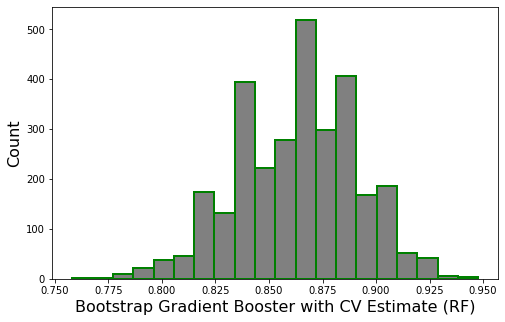

In [33]:
fig, axs = plt.subplots(ncols = 1, figsize=(8,5))
plt.hist(bs_output_gbc2_cv_acc.iloc[:,0].array, bins=20, 
         edgecolor='green', linewidth=2,color = "grey");
axs.set_xlabel('Bootstrap Gradient Booster with CV Estimate (RF)', fontsize=16)
axs.set_ylabel('Count', fontsize=16)

In [34]:
bs_output_dtc_cv_acc = bootstrap_validation(X_test,y_test,
                                        y_train, dtc_cv, 
                                        metrics_list= [accuracy], 
                                        sample = 3000)

Text(0, 0.5, 'Count')

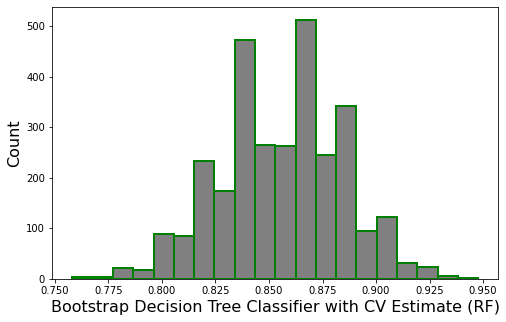

In [35]:
fig, axs = plt.subplots(ncols = 1, figsize=(8,5))
plt.hist(bs_output_dtc_cv_acc.iloc[:,0].array, bins=20, 
         edgecolor='green', linewidth=2,color = "grey");
axs.set_xlabel('Bootstrap Decision Tree Classifier with CV Estimate (RF)', fontsize=16)
axs.set_ylabel('Count', fontsize=16)

In [36]:
bs_output_rfc_acc = bootstrap_validation(X_test,y_test,
                                        y_train, final_rfc, 
                                        metrics_list= [accuracy], 
                                        sample = 3000)

Text(0, 0.5, 'Count')

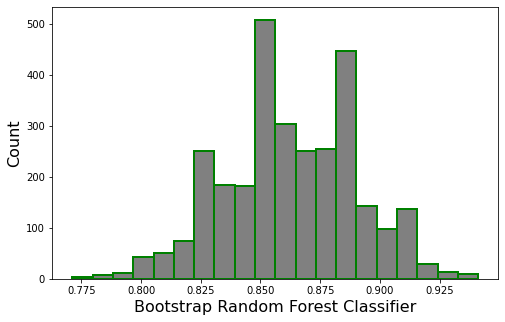

In [37]:
fig, axs = plt.subplots(ncols = 1, figsize=(8,5))
plt.hist(bs_output_rfc_acc.iloc[:,0].array, bins=20, 
         edgecolor='green', linewidth=2,color = "grey");
axs.set_xlabel('Bootstrap Random Forest Classifier', fontsize=16)
axs.set_ylabel('Count', fontsize=16)

In [38]:
from sklearn.metrics import accuracy_score
def bootstrap_validation(sample_num, model, X_traindata, X_testdata, y_traindata, y_testdata):
    model = model.fit(X_traindata, y_traindata)
    output_array = []
    for bs_iter in range(sample_num):
        bs_index = np.random.choice(X_testdata.index, len(X_testdata), replace = True)
        bs_data = X_testdata.loc[bs_index]
        bs_label = y_testdata.loc[bs_index]
        bs_predictions = model.predict(bs_data)
        output_array.append(accuracy_score(bs_label, bs_predictions))
    return pd.DataFrame(output_array)

In [39]:
rfc = RandomForestClassifier(max_features= rf_cv_acc2.best_params_['max_features'], ccp_alpha=rfc_cv_acc.best_params_['ccp_alpha'])
bootstraps = bootstrap_validation( 50, rfc,  X_train, X_test, y_train, y_test)
CI_bootstrap_rfc = np.quantile(bootstraps, np.array([0.25, 0.75]))
CI_bootstrap_rfc

array([0.83660131, 0.88235294])

In [40]:
bootstraps = bootstrap_validation( 50, gbc2_cv,  X_train, X_test, y_train, y_test)
CI_bootstrap_gbc_cv = np.quantile(bootstraps, np.array([0.25, 0.75]))
CI_bootstrap_gbc_cv

array([0.8496732 , 0.88888889])

In [41]:
bootstraps = bootstrap_validation( 50, dtc_cv,  X_train, X_test, y_train, y_test)
CI_bootstrap_dtc_cv = np.quantile(bootstraps, np.array([0.25, 0.75]))
CI_bootstrap_dtc_cv

Fitting 5 folds for each of 101 candidates, totalling 505 fits


array([0.83660131, 0.87581699])